# Import Libraries/Packages

In [1]:
# Import the required libraries
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Read In and Clean the Data
#### First off, we will read in the data from the CSV file, skipping the first row of the data and setting the "ID" column as the index. We will also change the name of one of the columns in the dataset to make it more orderly. Next we will check for any null values and remove them if there are any. The last step in this section will be to examine the general statistics of the data we will be using.

In [2]:
# Read the CSV file into a Pandas DataFrame. Skip the first row of data and set the index as the "ID".
cc_info_df = pd.read_csv(Path("./default_credit_card_clients.csv"), skiprows=1, index_col="ID")
cc_info_df.rename(columns = {'PAY_0':'PAY_1'}, inplace = True)

# Review the DataFrame
cc_info_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Check for null values
cc_info_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
# View the general decription of the data
cc_info_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# Exploratory Data Analysis (EDA)
#### In this section we will take a closer look at our data. We will initially separate the data into the target and features; the target variable will be "default payment next month" and the features will be the other 23 independent variables. After the data is separated we will examine the distribution of and correlations between each variable, along with calculating the P-Values and the Variance Inflation Factor (VIF) to help determine multicollinearity.

In [5]:
# Separate the data into target and features

# Separate the y variable, the target
y = cc_info_df["default payment next month"]

# Separate the X variable, the features
X = cc_info_df.drop(columns="default payment next month")

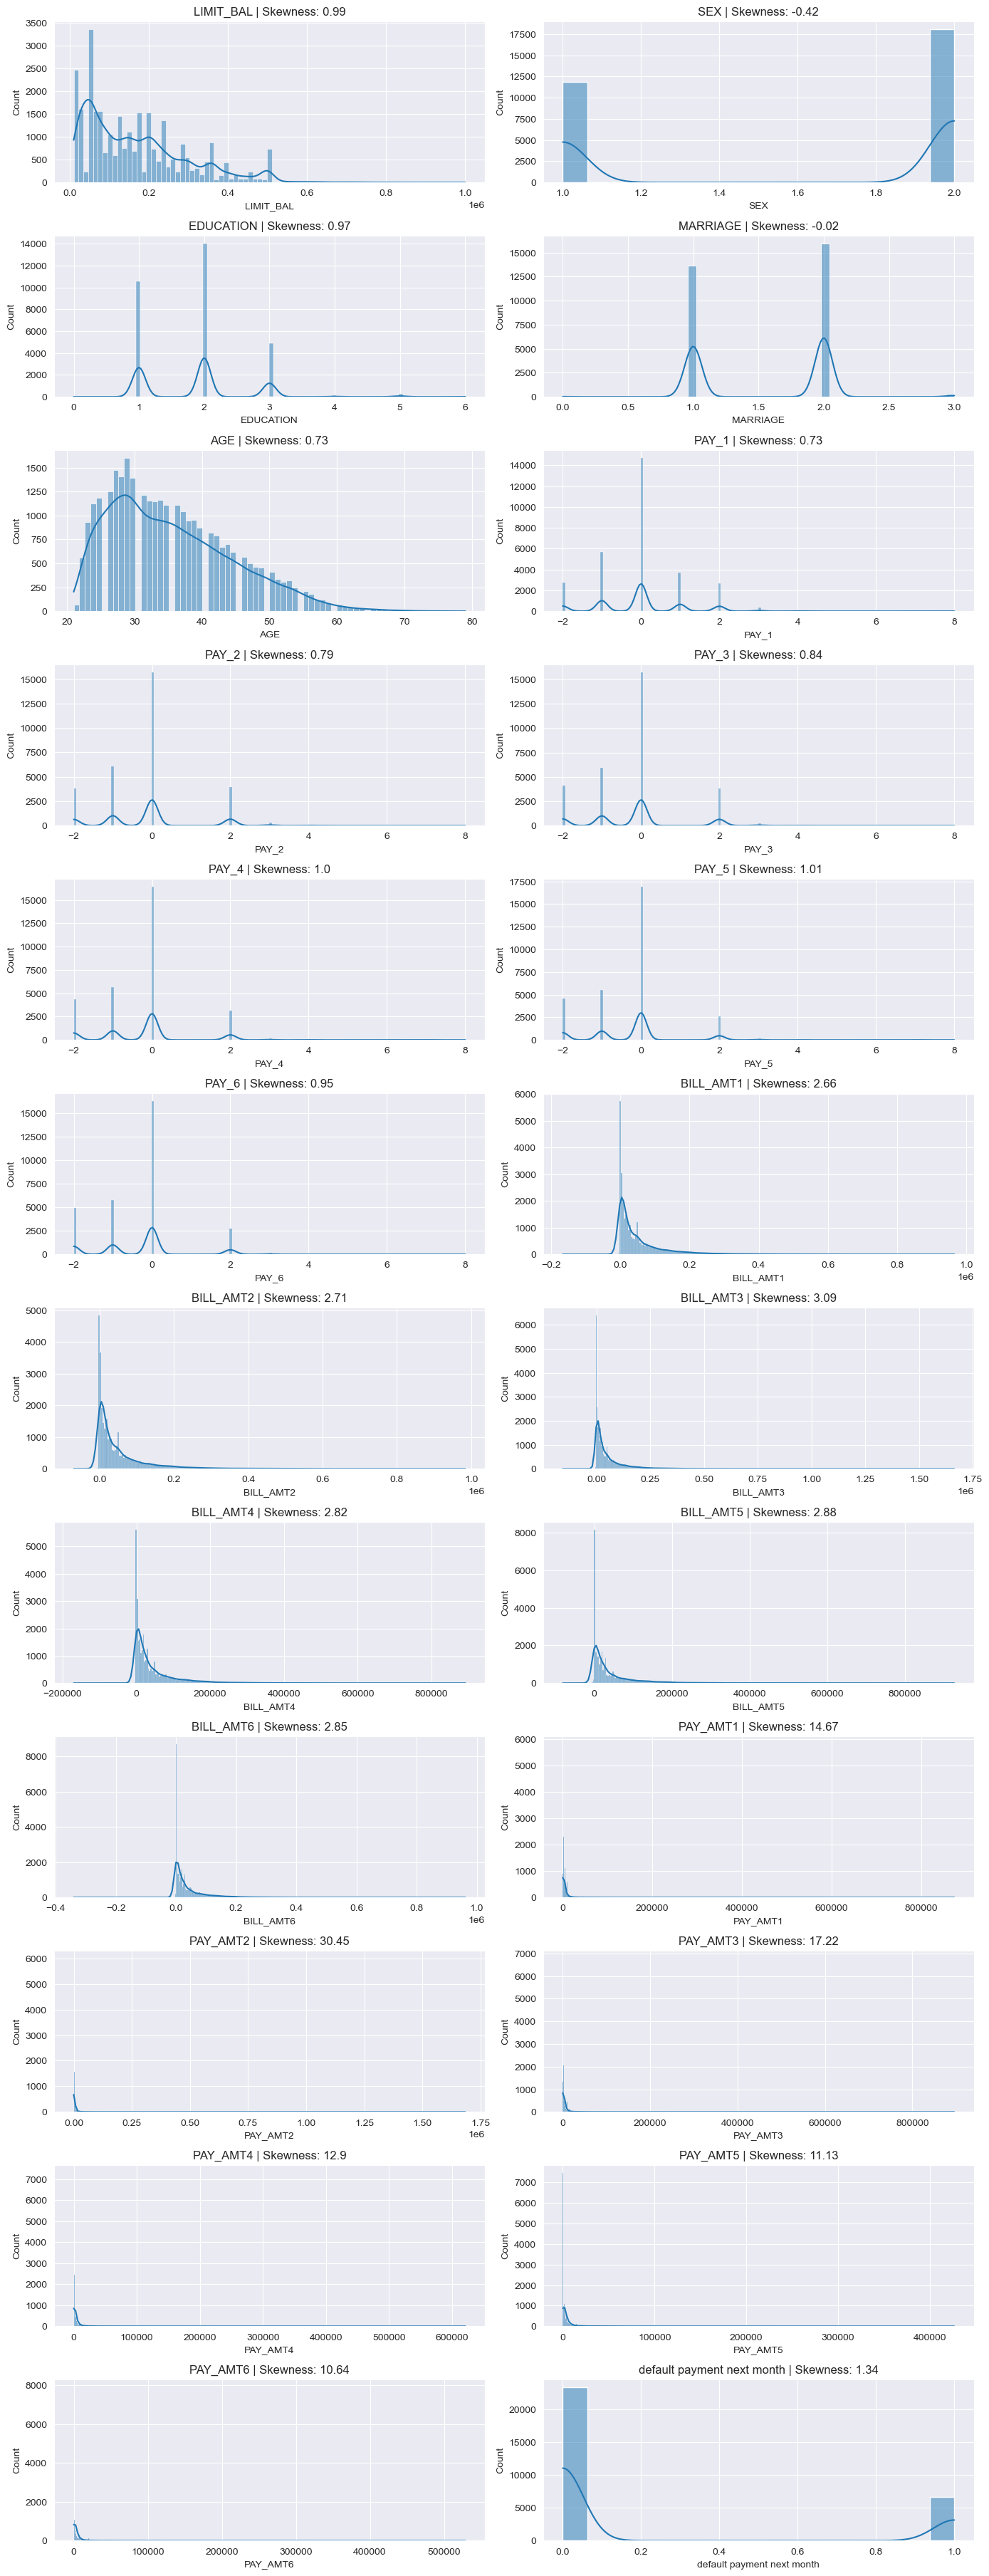

In [6]:
# Examine the distributions of each variable

# Set Seaborn style
sns.set_style("darkgrid")
 
# Identify numerical columns
numerical_columns = cc_info_df.select_dtypes(include=["int64", "float64"]).columns
 
# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(cc_info_df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(cc_info_df[feature].skew(), 2)}")
 
# Adjust layout and show plots
plt.tight_layout()
plt.show()

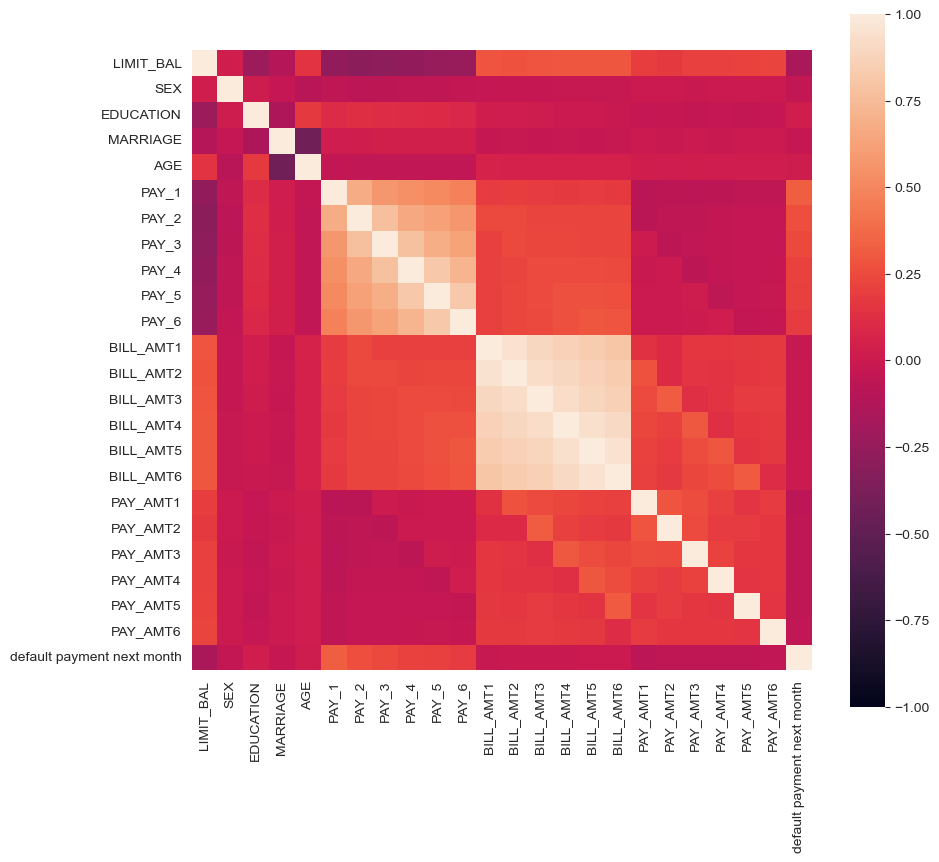

In [7]:
# Correlation matrix
corrmat = cc_info_df.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True);

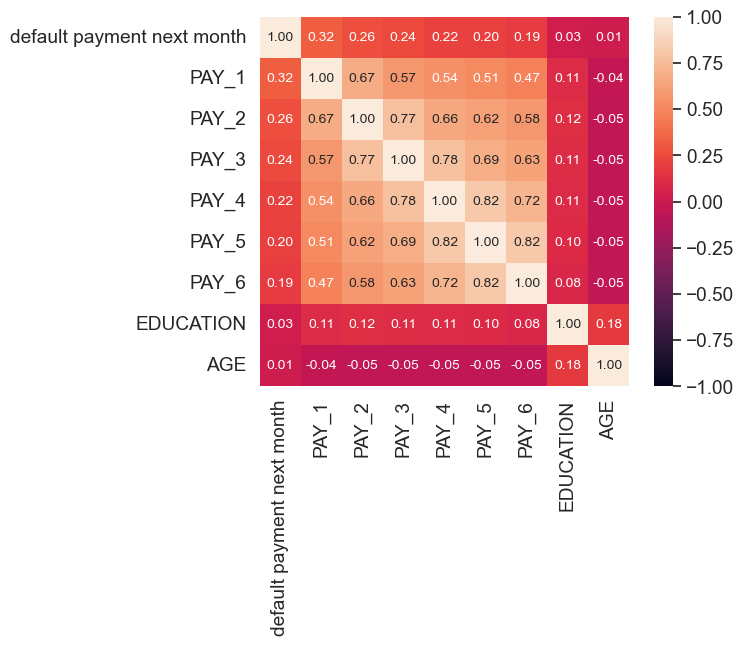

In [8]:
# Target variable correlation matrix
k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'default payment next month')['default payment next month'].index
cm = np.corrcoef(cc_info_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, vmax=1, vmin=-1)
plt.show()

In [9]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     default payment next month   R-squared:                       0.124
Model:                                    OLS   Adj. R-squared:                  0.123
Method:                         Least Squares   F-statistic:                     184.5
Date:                        Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                                19:55:33   Log-Likelihood:                -14202.
No. Observations:                       30000   AIC:                         2.845e+04
Df Residuals:                           29976   BIC:                         2.865e+04
Df Model:                                  23                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

0.9514836727518127


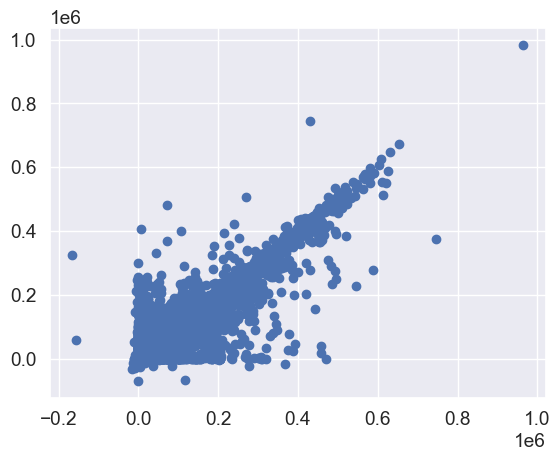

In [10]:
# Correlation between BILL_AMT1 and BILL_AMT2
print(cc_info_df['BILL_AMT1'].corr(cc_info_df['BILL_AMT2']))

# Scatter plot comparing BILL_AMT1 and BILL_AMT2
plt.scatter(cc_info_df['BILL_AMT1'], cc_info_df['BILL_AMT2']);

In [11]:
# Calculate the Variance Inflation Factor(VIF) to help determine multicollinearity
# Create the VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# Calculate VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

      feature        VIF
0   LIMIT_BAL   4.037479
1         SEX   9.092210
2   EDUCATION   6.731119
3    MARRIAGE   6.265388
4         AGE  10.857679
5       PAY_1   1.918276
6       PAY_2   3.211217
7       PAY_3   3.727427
8       PAY_4   4.440120
9       PAY_5   4.985856
10      PAY_6   3.463800
11  BILL_AMT1  20.823400
12  BILL_AMT2  38.214225
13  BILL_AMT3  31.783029
14  BILL_AMT4  29.548135
15  BILL_AMT5  35.986369
16  BILL_AMT6  21.426076
17   PAY_AMT1   1.907500
18   PAY_AMT2   2.384860
19   PAY_AMT3   1.911689
20   PAY_AMT4   1.805048
21   PAY_AMT5   1.854229
22   PAY_AMT6   1.270665


# Pre-Processing
#### We prepare the data for our models in this section. This includes choosing the columns to be our independent variables. Since we determined that there was some strong multicollinearity between the six 'BILL_AMT' features, we will calculate the average of these six columns and replace the six columns with a single 'AVG_BILL_AMT' column. Once this is done we will split the data into train and test sets and standardize them.

In [12]:
# Calculate the average of the 'BILL_AMT' columns and create a new column using this average. Then drop the 'BILL_AMT' columns from the DataFrame, leaving the new 'AVG_BILL_AMT' column.
cc_info_df['AVG_BILL_AMT'] = round(cc_info_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1), 2)
cc_info_df = cc_info_df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])
cc_info_df = cc_info_df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'AVG_BILL_AMT', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']]
cc_info_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,AVG_BILL_AMT,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,1284.00,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2846.17,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,16942.17,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,38555.67,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,18223.17,2000,36681,10000,9000,689,679,0


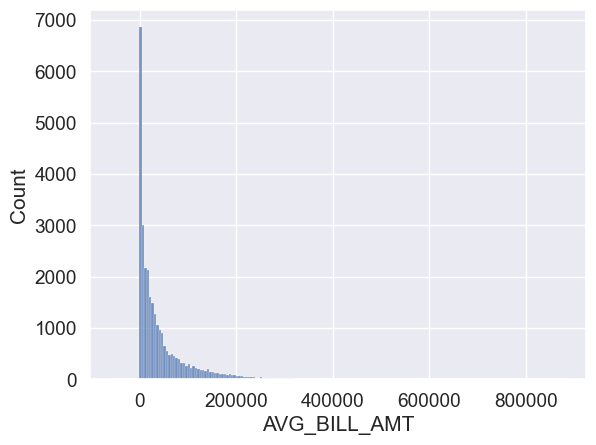

In [13]:
# Histogram of the 'AVG_BILL_AMT' feature
sns.histplot(cc_info_df['AVG_BILL_AMT'], binwidth=5000);

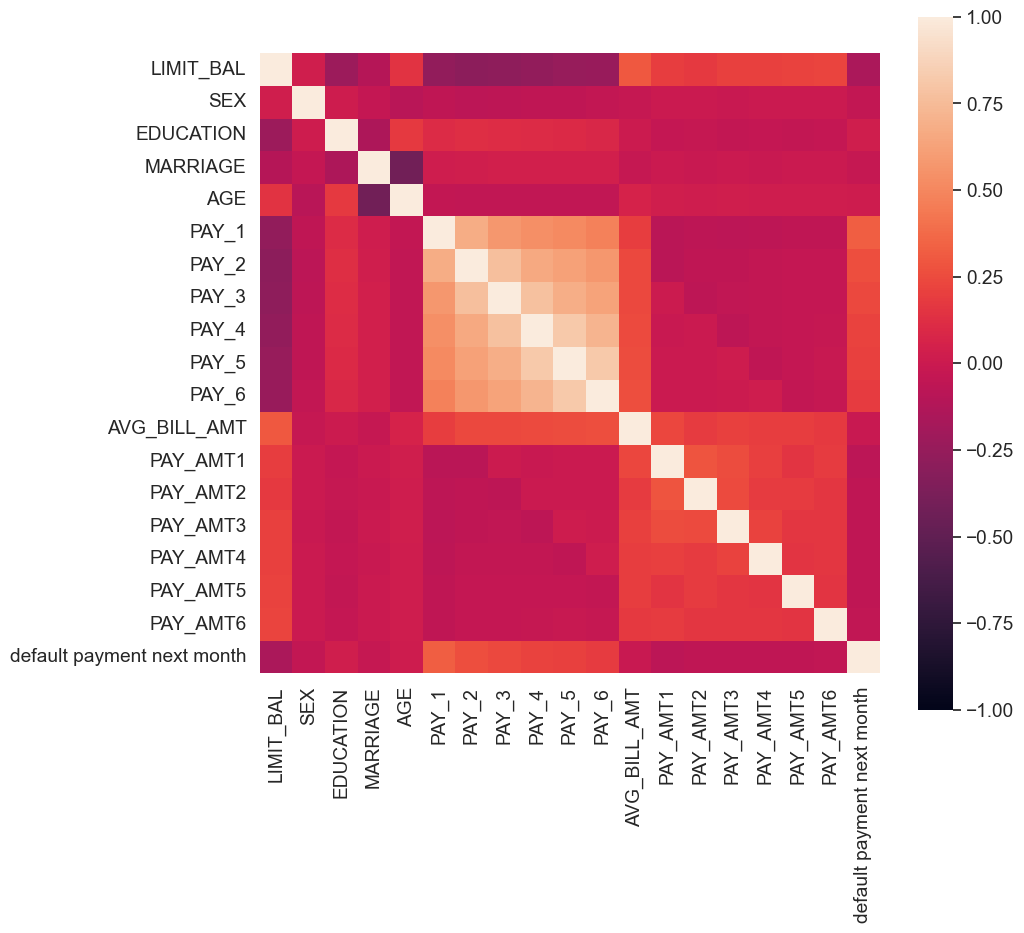

In [14]:
# Correlation Matrix using the updated DataFrame
updated_corrmat = cc_info_df.corr()
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(updated_corrmat, vmax=1, vmin=-1, square=True);

In [15]:
# Separate the updated DataFrame into target and features

# Separate the y variable, the target
y = cc_info_df["default payment next month"]

# Separate the X variable, the features
X = cc_info_df.drop(columns="default payment next month")

In [16]:
# Examine the OLS Regression Results using the updated target and features
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                OLS Regression Results                                
Dep. Variable:     default payment next month   R-squared:                       0.123
Model:                                    OLS   Adj. R-squared:                  0.122
Method:                         Least Squares   F-statistic:                     233.4
Date:                        Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                                19:55:37   Log-Likelihood:                -14221.
No. Observations:                       30000   AIC:                         2.848e+04
Df Residuals:                           29981   BIC:                         2.864e+04
Df Model:                                  18                                         
Covariance Type:                    nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

In [17]:
# Check the balance of the target values
y.value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [18]:
# Updated VIF dataframe 
updated_vif_data = pd.DataFrame() 
updated_vif_data["feature"] = X.columns 
  
# Calculating VIF for each feature 
updated_vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(updated_vif_data)

         feature        VIF
0      LIMIT_BAL   4.021099
1            SEX   9.076043
2      EDUCATION   6.710872
3       MARRIAGE   6.262482
4            AGE  10.857405
5          PAY_1   1.917353
6          PAY_2   3.187792
7          PAY_3   3.706226
8          PAY_4   4.427837
9          PAY_5   4.963319
10         PAY_6   3.408925
11  AVG_BILL_AMT   2.195200
12      PAY_AMT1   1.358614
13      PAY_AMT2   1.263148
14      PAY_AMT3   1.300570
15      PAY_AMT4   1.256146
16      PAY_AMT5   1.220924
17      PAY_AMT6   1.204309


In [19]:
# Split the updated DataFrame using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Logistic Regression Model
# Instantiate the Logistic Regression model and assign a random_state parameter of 1
lr_model = LogisticRegression(random_state=1)

# Fit the model using the training data
lr_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
lr_prediction = lr_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Logistic Regression model
lr_acc_score = round(balanced_accuracy_score(y_test, lr_prediction), 2)
print(f"Logistic Regression Model Balanced Accuracy Score: {lr_acc_score}")

Logistic Regression Model Balanced Accuracy Score: 0.6


              precision    recall  f1-score   support

           0       0.98      0.81      0.89      6991
           1       0.22      0.72      0.34       509

    accuracy                           0.81      7500
   macro avg       0.60      0.77      0.61      7500
weighted avg       0.92      0.81      0.85      7500



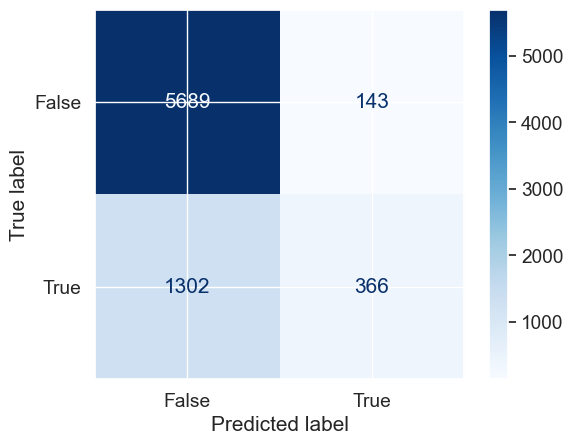

In [31]:
# Print the Confusion Matrix and the Classification Report for the Logistic Regression model
lr_confusion_matrix = confusion_matrix(y_test, lr_prediction)
lr_classification_report = classification_report(lr_prediction, y_test)
lr_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])
lr_cm_display.plot(cmap='Blues')
print(lr_classification_report)

In [23]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Build a Random Forest Classifier and assign a random_state parameter of 1
rf_model = RandomForestClassifier(n_estimators = 100, random_state=1)

# Fit the model using the training data
rf_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
rf_prediction = rf_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Random Forest model
rf_acc_score = round(balanced_accuracy_score(y_test, rf_prediction), 2)
print(f"Random Forest Model Balanced Accuracy Score: {rf_acc_score}")

Random Forest Model Balanced Accuracy Score: 0.65


              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5832
           1       0.65      0.36      0.46      1668

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.67      7500
weighted avg       0.80      0.81      0.79      7500



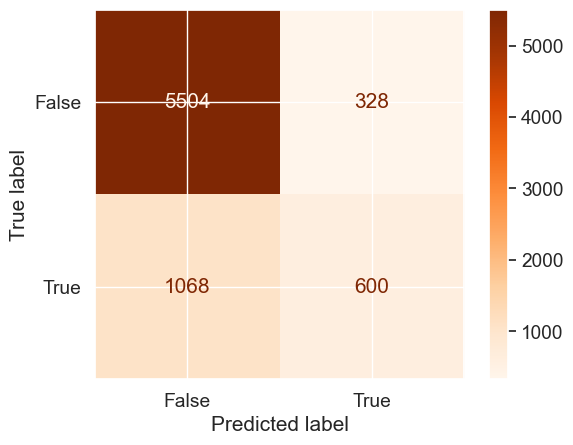

In [34]:
# Print the Confusion Matrix and the Classification Report for the Random Forest model
rf_confusion_matrix = confusion_matrix(y_test, rf_prediction)
rf_classification_report = classification_report(y_test, rf_prediction)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])
rf_cm_display.plot(cmap='Oranges')
print(rf_classification_report)

In [25]:
# Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier and assign a random_state parameter of 1
nb_model = GaussianNB()

# Fit the model using the training data
nb_model.fit(X_train_scaled, y_train)

# Make a prediction using the testing data
nb_prediction = nb_model.predict(X_test_scaled)

# Print the balanced_accuracy score of the Naive Bayes model
nb_acc_score = round(balanced_accuracy_score(y_test, nb_prediction), 2)
print(f"Naive Bayes Model Balanced Accuracy Score: {nb_acc_score}")

Naive Bayes Model Balanced Accuracy Score: 0.69


              precision    recall  f1-score   support

           0       0.87      0.79      0.83      5832
           1       0.44      0.60      0.51      1668

    accuracy                           0.74      7500
   macro avg       0.66      0.69      0.67      7500
weighted avg       0.78      0.74      0.76      7500



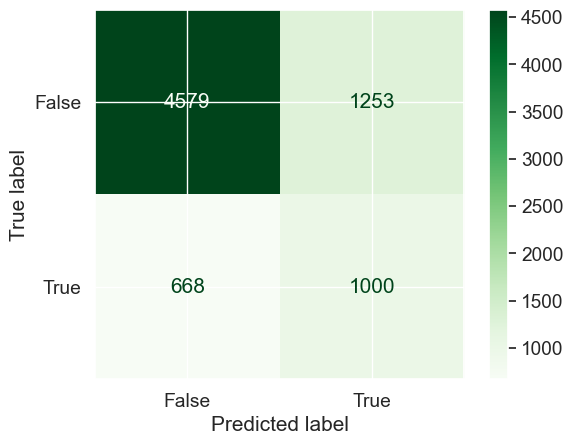

In [33]:
# Print the Confusion Matrix and the Classification Report for the Naive Bayes model
nb_confusion_matrix = confusion_matrix(y_test, nb_prediction)
nb_classification_report = classification_report(y_test, nb_prediction)
nb_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])
nb_cm_display.plot(cmap='Greens')
print(nb_classification_report)

In [37]:
# Neural Network Model

# Create a sequential model and assign a random_state parameter of 1
neuron = Sequential()

# Add first layer
number_inputs = 18
number_hidden_nodes = 1

neuron.add(Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add output layer
number_classes = 1

neuron.add(Dense(units=number_classes, activation="sigmoid"))

# Compile model
neuron.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fitting the model
nn_model = neuron.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50


704/704 [==============================] - 3s 2ms/step - loss: 0.6444 - accuracy: 0.7332
Epoch 2/50
704/704 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.8062
Epoch 3/50
704/704 [==============================] - 2s 2ms/step - loss: 0.4825 - accuracy: 0.8094
Epoch 4/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.8122
Epoch 5/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4596 - accuracy: 0.8127
Epoch 6/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4572 - accuracy: 0.8145
Epoch 7/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4560 - accuracy: 0.8162
Epoch 8/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4544 - accuracy: 0.8186
Epoch 9/50
704/704 [==============================] - 1s 2ms/step - loss: 0.4533 - accuracy: 0.8195
Epoch 10/50
704/704 [==============================] - 2s 2ms/step - loss: 0.4528 - accuracy: 0.82

In [40]:
nn_model_loss, nn_model_accuracy = neuron.evaluate(
    X_test_scaled, y_test, verbose=2
)
print(f"Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

235/235 - 0s - loss: 0.4529 - accuracy: 0.8177 - 479ms/epoch - 2ms/step
Loss: 0.45288360118865967, Accuracy: 0.8177333474159241
